Course: CSC 5610 302
Project #1: Introduction to Datascience
Due Date: 9/18/2023
Student: Arsalon Amini

In [75]:
import pandas as pd

# Define the file path
file_path = "~/Desktop/ai_tools/csc5610-m2-Sacramento-real-estate-transactions-1.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Setup some global configs
pd.set_option('display.expand_frame_repr', False) # format config

# Setup some helper functions - Function to format currencies
def format_currency(price):
    return '${:,.2f}'.format(price)


# Data Exploration - Printing the Head for viewing
print("DataFrame Head:")
df.columns = df.columns.str.upper() 
df['PRICE'] = df['PRICE'].apply(format_currency)
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE']).dt.date #Perform type conversion then extract date only
print(df.head())

DataFrame Head:
            ADDRESS        CITY    ZIP STATE  BEDS  BATHS  SQ__FT         TYPE   SALE_DATE       PRICE   LATITUDE   LONGITUDE
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836  Residential  2008-05-21  $59,222.00  38.631913 -121.434879
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167  Residential  2008-05-21  $68,212.00  38.478902 -121.431028
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796  Residential  2008-05-21  $68,880.00  38.618305 -121.443839
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852  Residential  2008-05-21  $69,307.00  38.616835 -121.439146
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797  Residential  2008-05-21  $81,900.00  38.519470 -121.435768


/var/folders/32/7pznm6jd5rz3p46wf8k0bs6w0000gn/T/ipykernel_57641/3483612067.py:21: FutureWarning: Parsed string "Wed May 21 00:00:00 EDT 2008" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE']).dt.date #Perform type conversion then extract date only


In the above table of values from our csv dataset we can notice that there are 12 columns spanning from the street address of a property to the latitude and longitude of the property. The table also includes information regarding the type of property, the date of the sale of the property and the price of the property. 

In [76]:
# Print the data frame information summary
print("Data Frame Info Summary: ")
info_summary = df.info()

Data Frame Info Summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ADDRESS    985 non-null    object 
 1   CITY       985 non-null    object 
 2   ZIP        985 non-null    int64  
 3   STATE      985 non-null    object 
 4   BEDS       985 non-null    int64  
 5   BATHS      985 non-null    int64  
 6   SQ__FT     985 non-null    int64  
 7   TYPE       985 non-null    object 
 8   SALE_DATE  985 non-null    object 
 9   PRICE      985 non-null    object 
 10  LATITUDE   985 non-null    float64
 11  LONGITUDE  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


Summary of the data info above: 

The above data info object shows us that the total data set has 985 rows of data entries representing a total data set of 985 properties. The data set includes object types that represent address specific information as well as numerical data such that represent details of the property like beds, baths, square feet and latitude/longitude.

Number of columns: 11 total columns (representing a total of 11 features for each data entry)
Number of rows: 985 total rows (representing 985 total properties in the data set)

Due to the fact that all columns show the same number of non-null rows, I believe there are no missing values in the dataset. 
Of the 985 rows of data, there are 11 variables that represent the columns in the dataset.

Information Not Found: 
The data info object doesn't tell me how many unique values there are in each column ~ the City, State and Type columns for example maybe good categorical values, but I do not know their unique counts. Without this information I would not know if a particular column has a finite and limited set of unique values for categorical selection.


Further Investigations:
I would like to know how many unique values for cities, states and types are in the data set so I can understand the nature of the data and choose categorical values to use for filtering and grouping the data set. 

I will investigate these variables in the next step to get further information: 
1. Type - it could have a finite set of categorical representations so long as the data collection restricted input to specific categories like Ex. Residential, Commerical
2. City - it could have a larger set of categorical representations but they are finite (city < 100k categories)
3. State - it could have a smaller set of categorical reprsentations (ex. 52 categories)

In [77]:
# Finding Categorical Possibilities 

columns = df.columns 
unique_counts = {}

for column in columns: 
    unique_count = df[column].nunique()
    unique_counts[column] = unique_count # k=column name, v=unique counts
    
# Iteration the dictionary and print k,v
for column, count in unique_counts.items():
    print(f"Column '{column}': {count} unique values")


Column 'ADDRESS': 981 unique values
Column 'CITY': 39 unique values
Column 'ZIP': 68 unique values
Column 'STATE': 1 unique values
Column 'BEDS': 8 unique values
Column 'BATHS': 6 unique values
Column 'SQ__FT': 603 unique values
Column 'TYPE': 4 unique values
Column 'SALE_DATE': 5 unique values
Column 'PRICE': 605 unique values
Column 'LATITUDE': 969 unique values
Column 'LONGITUDE': 967 unique values


After finding out the number of unique values per feature (column) I could possibly select the following features to be categorical:

Note that although we can change some of the "object" types to categorical, it might also be interesting to change some of the numeric and date_time objects to categorical values as well. 

1. State: There is only 1 unique value therefore this might not be a great feature to use for further analysis as the category size is not greater than 1
2. Baths: The number of baths seems to have only 6 possible unique values making this a feature that could be interesting to coorelate with price or location variables
3. Type: The type of property has only 4 unique values, this would be another good categorical choice to see the mean, median, price based on this feature
4. Sale_date: This is interesting that there are only 5 unique values as I would expect this to have many more values, this could indicate that the data set has come from only a few days worth of real estate transactions. Nonetheless, this could be another categorical variable we could use to see how the date of sale impacts the number of beds, price and location. 
5. Beds: This column only has 8 unique values, which could again, be an interesting categorical variable to see the mean, median, mode of the number of beds. 

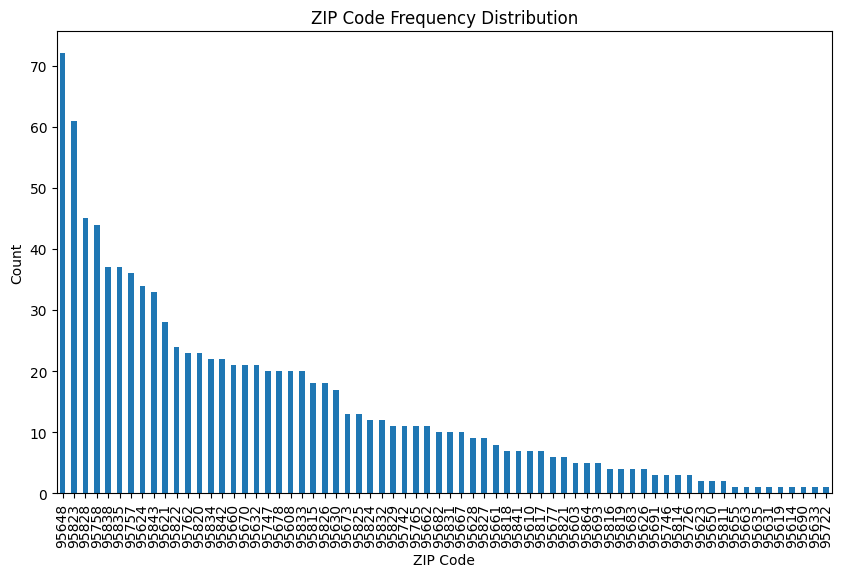

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # sets figure size width to 10inch x 6 inch

df['ZIP'].value_counts().plot(kind='bar')  # returns a new panda series (frequency distribution), index=ZIP, value=count

# Set plot labels and title
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.title('ZIP Code Frequency Distribution')

# Show the plot
plt.show()


In the above plot of zip code frequencies from our real estate transactions data set, we can see that the number of properties involving transactions have a high frequency in specific area codes and less transactions in other area codes. The top three area codes with the largest number of transactions are 95948, 95823 and 95828. 

In [79]:
# Convert ZIP and TYPE to categorical
categorical_columns = ['ZIP', 'TYPE']

for column in categorical_columns:
    df[column] = df[column].astype('category')

print("Check the new datatypes")
print(df.info())


Check the new datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ADDRESS    985 non-null    object  
 1   CITY       985 non-null    object  
 2   ZIP        985 non-null    category
 3   STATE      985 non-null    object  
 4   BEDS       985 non-null    int64   
 5   BATHS      985 non-null    int64   
 6   SQ__FT     985 non-null    int64   
 7   TYPE       985 non-null    category
 8   SALE_DATE  985 non-null    object  
 9   PRICE      985 non-null    object  
 10  LATITUDE   985 non-null    float64 
 11  LONGITUDE  985 non-null    float64 
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 81.8+ KB
None


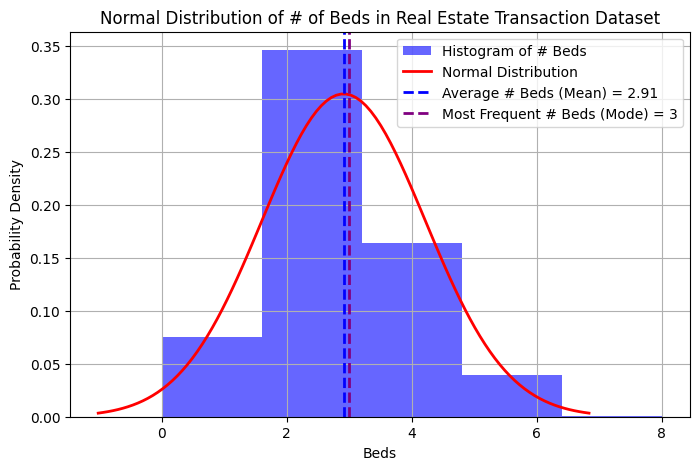

In [89]:
# I want to see the distribution of beds to understand the property sales as they relate to the number of beds
import numpy as np
from scipy.stats import norm

# Compute mean, median, and mode using pandas
mean = df['BEDS'].mean()
median = df['BEDS'].median()
mode = df['BEDS'].mode().values[0] # returns a panda series, values[0] = mode

# Plot the normal distribution of beds
plt.figure(figsize=(8, 5))
plt.hist(df['BEDS'], bins=5, density=True, alpha=0.6,
         color='b', label='Histogram of # Beds')

# Create a normal distribution curve based on mean and standard deviation
mu, std = mean, df['BEDS'].std() 
x = np.linspace(mu - 3*std, mu + 3*std, 100) # creates an array of x values for plotting the pdf along x-axis
plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='Normal Distribution') #norm.pdf calculates y values at each x

# Add mean, median, and mode to the plot
plt.axvline(mean, color='b', linestyle='dashed',
            linewidth=2, label=f'Average # Beds (Mean) = {mean:.2f}')
plt.axvline(mode, color='purple', linestyle='dashed',
            linewidth=2, label=f'Most Frequent # Beds (Mode) = {mode}')

# Set labels and title
plt.xlabel('Beds')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of # of Beds in Real Estate Transaction Dataset')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


some comments on the above

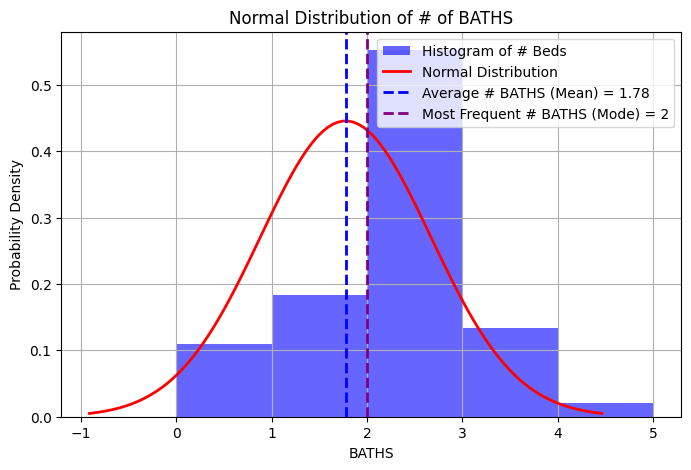

In [90]:
# I want to see the distribution of beds to understand the property sales as they relate to the number of beds
import numpy as np
from scipy.stats import norm

# Compute mean, median, and mode using pandas
mean = df['BATHS'].mean()
median = df['BATHS'].median()
mode = df['BATHS'].mode().values[0]  # returns a panda series, values[0] = mode

# Plot the normal distribution of beds
plt.figure(figsize=(8, 5))
plt.hist(df['BATHS'], bins=5, density=True, alpha=0.6,
         color='b', label='Histogram of # Beds')

# Create a normal distribution curve based on mean and standard deviation
mu, std = mean, df['BATHS'].std()
# creates an array of x values for plotting the pdf along x-axis
x = np.linspace(mu - 3*std, mu + 3*std, 100)
# norm.pdf calculates y values at each x
plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='Normal Distribution')

# Add mean, median, and mode to the plot
plt.axvline(mean, color='b', linestyle='dashed',
            linewidth=2, label=f'Average # BATHS (Mean) = {mean:.2f}')
plt.axvline(mode, color='purple', linestyle='dashed',
            linewidth=2, label=f'Most Frequent # BATHS (Mode) = {mode}')

# Set labels and title
plt.xlabel('BATHS')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of # of BATHS')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


some comments

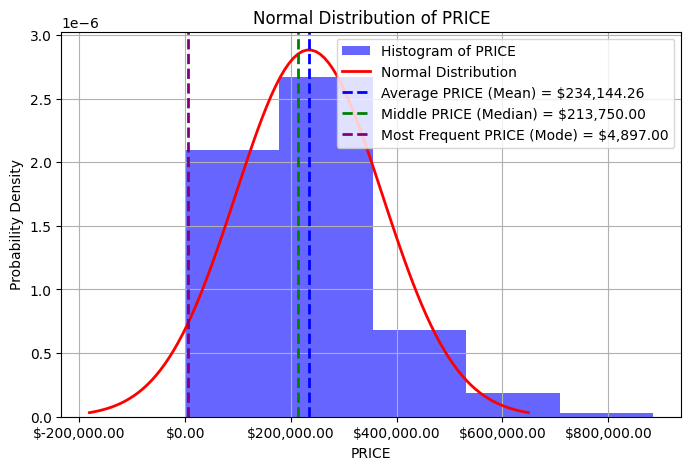

In [102]:
# I want to see the distribution of PRICE to understand the distribution as it relates to price
from matplotlib.ticker import FuncFormatter
import numpy as np
from scipy.stats import norm


# Compute mean, median, and mode using pandas
mean = df['PRICE'].mean()
median = df['PRICE'].median()
mode = df['PRICE'].mode().values[0]  # returns a panda series, values[0] = mode

# format the currency in the graph
def currency_format(x, pos):
    formatted_value = "${:,.2f}".format(x)
    return formatted_value

# Plot the normal distribution of beds
plt.figure(figsize=(8, 5))
plt.hist(df['PRICE'], bins=5, density=True, alpha=0.6,
         color='b', label='Histogram of PRICE')

# Create a normal distribution curve based on mean and standard deviation
mu, std = mean, df['PRICE'].std()
# creates an array of x values for plotting the pdf along x-axis
x = np.linspace(mu - 3*std, mu + 3*std, 100)
# norm.pdf calculates y values at each x
plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='Normal Distribution')

# Add mean, median, and mode to the plot
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_format)) #get current axis and format it
plt.axvline(mean, color='b', linestyle='dashed',
            linewidth=2, label=f'Average PRICE (Mean) = {currency_format(mean, 0)}')
plt.axvline(median, color='green', linestyle='dashed',
            linewidth=2, label=f'Middle PRICE (Median) = {currency_format(median, 0)}')
plt.axvline(mode, color='purple', linestyle='dashed',
            linewidth=2, label=f'Most Frequent PRICE (Mode) = {currency_format(mode, 0)}')

# Set labels and title
plt.xlabel('PRICE')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of PRICE')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


some comments

Basically after seeing the mode being $4,897 while the mean and median prices were hundreds of thousands of dollars (normal prices for house), something didn't seem right. So I wanted to get a frequency distribution of the prices to see the price distribution to understand if this was erraneous data skewing the mode.

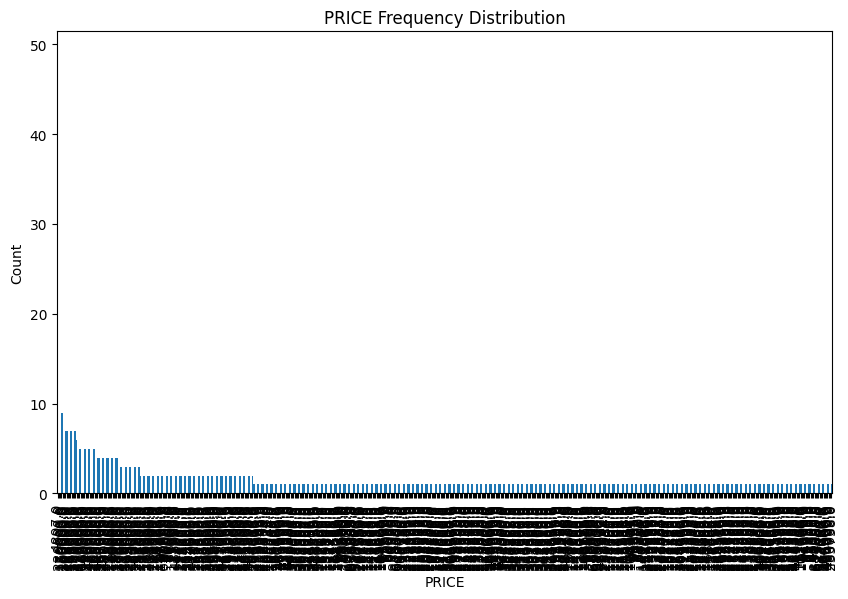

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # sets figure size width to 10inch x 6 inch

# returns a new panda series (frequency distribution), index=ZIP, value=count
df['PRICE'].value_counts().plot(kind='bar')

# Set plot labels and title
plt.xlabel('PRICE')
plt.ylabel('Count')
plt.title('PRICE Frequency Distribution')

# Show the plot
plt.show()


after seeing this I decided I'd like to see the number of unique values for prices 

In [104]:
unique_prices_count = df['PRICE'].nunique()
print("Number of Unique Prices:", unique_prices_count)


Number of Unique Prices: 605


I can see that there are 605 unique prices in the dataset, representing a continuous distribution of prices. I am now curious to see top 10 price distribution counts to check if there is erraneous data that is skewing the mode and causing the very low price value to appear with a high count. 



In [106]:
top_10_price_buckets = df['PRICE'].value_counts().head(10)
print("Top 10 Price Buckets:")
print(top_10_price_buckets)

bottom_10_price_buckets = df['PRICE'].value_counts().tail(10)
print("Bottom 10 Price Buckets:")
print(bottom_10_price_buckets)


Top 10 Price Buckets:
PRICE
4897.0      49
220000.0    10
170000.0     9
150000.0     9
250000.0     9
205000.0     8
300000.0     7
165000.0     7
215000.0     7
180000.0     7
Name: count, dtype: int64
Bottom 10 Price Buckets:
PRICE
582000.0    1
572500.0    1
541000.0    1
504000.0    1
500500.0    1
495000.0    1
485000.0    1
484000.0    1
480000.0    1
235738.0    1
Name: count, dtype: int64


From the data, I can see that $4,897 has 49 counts which is why it has taken over my mode as the most frequent value. Because these entries are so far from the median, it would suggest that they are erraneous data entries and skewing the mode value. 

The next step I will do is remove them and replot my graph to see the new mode.

In [107]:
# Identify the first price bucket
first_price_bucket = df['PRICE'].value_counts().index[0]
# Remove rows with the first price bucket
df = df[df['PRICE'] != first_price_bucket]

top_10_price_buckets = df['PRICE'].value_counts().head(10)
print("Top 10 Price Buckets:")
print(top_10_price_buckets)


Top 10 Price Buckets:
PRICE
220000.0    10
170000.0     9
250000.0     9
150000.0     9
205000.0     8
200000.0     7
230000.0     7
145000.0     7
215000.0     7
225000.0     7
Name: count, dtype: int64


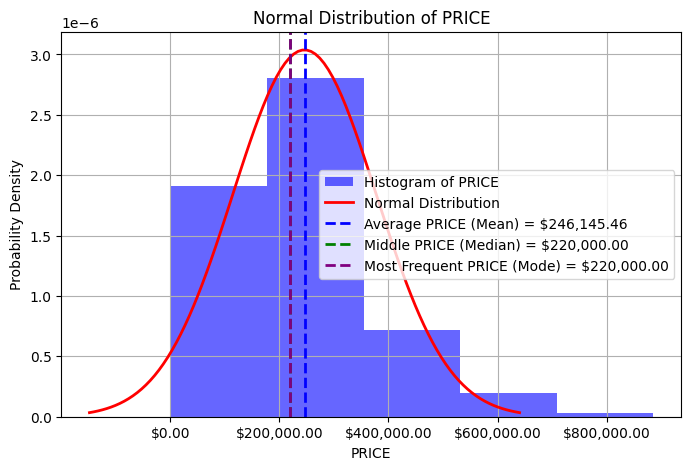

In [108]:
from matplotlib.ticker import FuncFormatter
import numpy as np
from scipy.stats import norm


# Compute mean, median, and mode using pandas
mean = df['PRICE'].mean()
median = df['PRICE'].median()
mode = df['PRICE'].mode().values[0]  # returns a panda series, values[0] = mode

# format the currency in the graph


def currency_format(x, pos):
    formatted_value = "${:,.2f}".format(x)
    return formatted_value


# Plot the normal distribution of beds
plt.figure(figsize=(8, 5))
plt.hist(df['PRICE'], bins=5, density=True, alpha=0.6,
         color='b', label='Histogram of PRICE')

# Create a normal distribution curve based on mean and standard deviation
mu, std = mean, df['PRICE'].std()
# creates an array of x values for plotting the pdf along x-axis
x = np.linspace(mu - 3*std, mu + 3*std, 100)
# norm.pdf calculates y values at each x
plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='Normal Distribution')

# Add mean, median, and mode to the plot
plt.gca().xaxis.set_major_formatter(FuncFormatter(
    currency_format))  # get current axis and format it
plt.axvline(mean, color='b', linestyle='dashed',
            linewidth=2, label=f'Average PRICE (Mean) = {currency_format(mean, 0)}')
plt.axvline(median, color='green', linestyle='dashed',
            linewidth=2, label=f'Middle PRICE (Median) = {currency_format(median, 0)}')
plt.axvline(mode, color='purple', linestyle='dashed',
            linewidth=2, label=f'Most Frequent PRICE (Mode) = {currency_format(mode, 0)}')

# Set labels and title
plt.xlabel('PRICE')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of PRICE')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


This looks a lot better and I have removed the 49 entries that were erraneous input and skewing my graph. I am pleased with this result. 

Summary Statistics:
             BEDS       BATHS       SQ__FT          PRICE    LATITUDE   LONGITUDE
count  936.000000  936.000000   936.000000     936.000000  936.000000  936.000000
mean     3.053419    1.863248  1383.753205  246145.456197   38.593196 -121.359451
std      1.166983    0.825072   818.823827  131339.507240    0.134191    0.140999
min      0.000000    0.000000     0.000000    1551.000000   38.241514 -121.551704
25%      3.000000    1.000000  1013.750000  155950.000000   38.478802 -121.448627
50%      3.000000    2.000000  1330.000000  220000.000000   38.619343 -121.382269
75%      4.000000    2.000000  1760.000000  305000.000000   38.686063 -121.307899
max      8.000000    5.000000  5822.000000  884790.000000   39.020808 -120.597599


/Users/arsalonamini/Desktop/ai_tools/ai_tools/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arsalonamini/Desktop/ai_tools/ai_tools/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arsalonamini/Desktop/ai_tools/ai_tools/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arsalonamini/Desktop/ai_tools/ai_tools/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

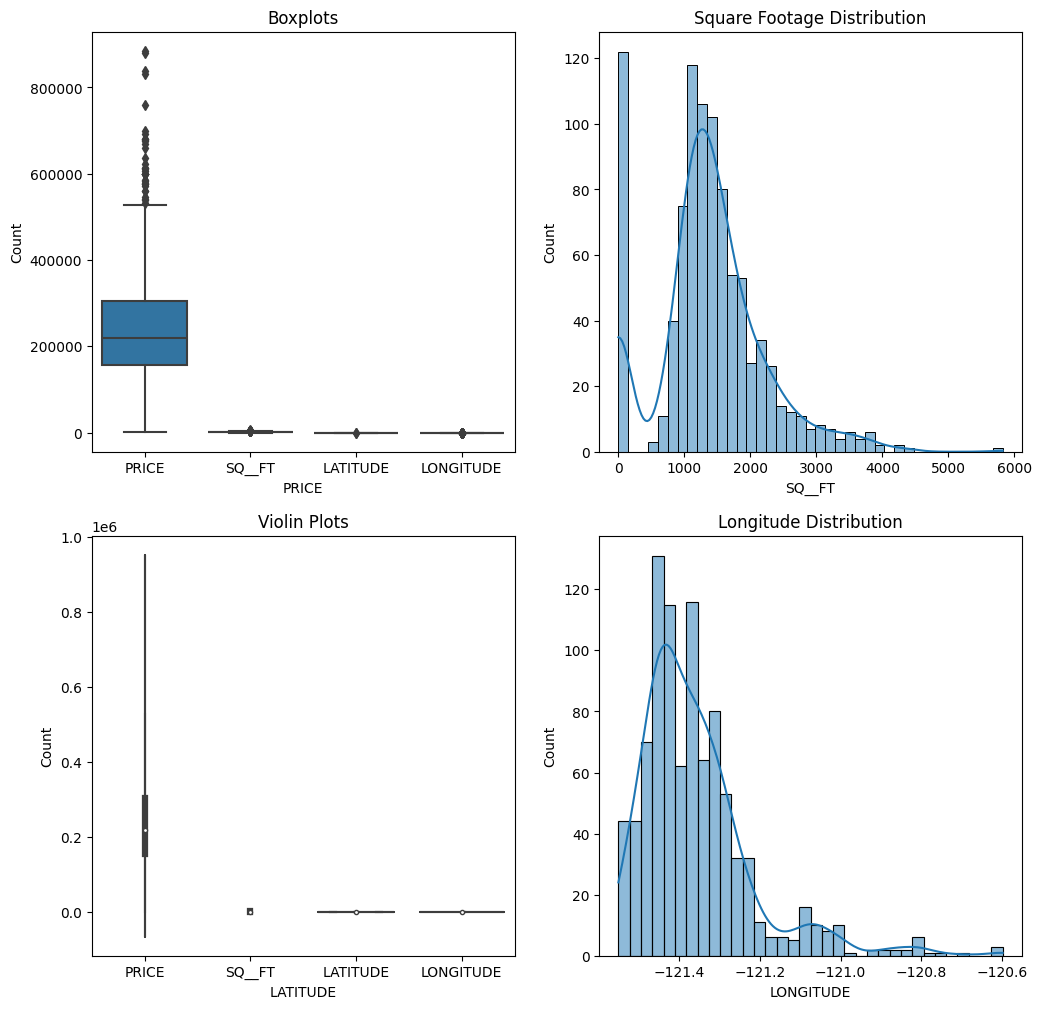

<Figure size 1200x500 with 0 Axes>

In [112]:
import seaborn as sns

# Describe the DataFrame
print("Summary Statistics:")
print(df.describe())

# Creates a figure(canvas) to display subplots in 2x2 array
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot histograms
sns.histplot(df['PRICE'], ax=axes[0, 0], kde=True)
sns.histplot(df['SQ__FT'], ax=axes[0, 1], kde=True)
sns.histplot(df['LATITUDE'], ax=axes[1, 0], kde=True)
sns.histplot(df['LONGITUDE'], ax=axes[1, 1], kde=True)

# Set titles
axes[0, 0].set_title('Price Distribution')
axes[0, 1].set_title('Square Footage Distribution')
axes[1, 0].set_title('Latitude Distribution')
axes[1, 1].set_title('Longitude Distribution')

# Plot boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(
    data=df[['PRICE', 'SQ__FT', 'LATITUDE', 'LONGITUDE']], ax=axes[0, 0])
axes[0, 0].set_title('Boxplots')

# Plot violin plots
sns.violinplot(
    data=df[['PRICE', 'SQ__FT', 'LATITUDE', 'LONGITUDE']], ax=axes[1, 0])
axes[1, 0].set_title('Violin Plots')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
